<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/answer/2_線形回帰/2-2_（演習）線形回帰による戸建ての価格予測.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 2-2_線形回帰による戸建ての価格予測

このノートブックでは、線形回帰で予測モデルを作成します。

予測を行うテーマは物件の価格を予測することです。
神奈川県にある、JR東海道線の戸塚駅周辺物件情報を用意しました。2019年4月～2021年3月までの2年間で売買が成立した**戸建て住宅**の、住宅価格と価格以外の情報を確認して、価格以外の情報から住宅価格を予測してみましょう。

## ライブラリのインポート

In [ ]:
# データを処理するための基本的なライブラリ
# どれも途中で使用することが多いので、今回は使うかどうかにかかわらずひとまずインポートする
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# scikit-learnから機械学習モデルをインポート。今回は線形回帰モデル。
from sklearn.linear_model import LinearRegression

In [ ]:
'''
matplotlibに日本語を表示させたいときには以下のコマンドを実行して、japanize_matplotlibをインストールしておく。
Google Colaboratoryにプリインストールされていないので、インストール作業が必要。
'''
# !を先頭に入れるとBashコマンドを入力できる
!pip install japanize_matplotlib | tail -n 1
# 日本語を表示させるために必要な設定
import japanize_matplotlib

Google Colaboratory上での出力のデフォルト設定

In [ ]:
# pandasのDataframeの出力
pd.set_option('display.max_columns', 500) # 表示列の最大
pd.set_option('display.max_rows', 500) # 表示行の最大
pd.set_option('display.unicode.east_asian_width', True) # 日本語出力時にヘッダのずれを解消
pd.options.display.float_format = '{:,.5f}'.format # 表示桁数の設定

# ノートブックの表示桁数設定。この設定はprint文には作用せず、セルの最後に書いたものを出力する際に適用されます。
%precision 3
# numpy配列の指数表示禁止設定
np.set_printoptions(suppress=True)
# numpy配列の表示桁数設定
np.set_printoptions(precision=3)

## データの準備

#### データを取り込む
- pandasのread_csvメソッドを使用して、mlho/data/totsuka_kodate.csvファイルを読み込みます
- 読み込んだものは変数totsuka_kodateに代入します

In [ ]:
totsuka_kodate = pd.read_csv("/content/drive/MyDrive/mlho/data/totsuka_kodate.csv")

#### データを確認する

In [ ]:
# 読み込んだデータを確認します
totsuka_kodate.head()

,地区名,最寄駅距離（分）,取引価格,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,築年数,構造,前面道路方位,前面道路種類,前面道路幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引年
0,秋葉町,45,33000000,125,ほぼ長方形,7.00000,100,令和2年,0,木造,東,市道,5.50000,第１種低層住居専用地域,50.00000,80.00000,2020
1,柏尾町,45,23000000,190,長方形,12.00000,110,昭和63年,33,木造,北,市道,6.50000,第１種低層住居専用地域,40.00000,80.00000,2021
2,柏尾町,24,32000000,65,ほぼ長方形,9.00000,105,令和2年,0,木造,北西,市道,5.00000,準工業地域,60.00000,200.00000,2020
3,柏尾町,45,38000000,145,ほぼ長方形,7.90000,105,令和2年,0,木造,西,市道,2.20000,第１種低層住居専用地域,40.00000,80.00000,2020
4,柏尾町,24,35000000,110,不整形,20.00000,100,令和2年,0,木造,北,市道,4.00000,準工業地域,60.00000,200.00000,2020


In [ ]:
# totsuka_kodateのデータ要約を確認
totsuka_kodate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   地区名        213 non-null    object 
 1   最寄駅距離（分）   213 non-null    int64  
 2   取引価格       213 non-null    int64  
 3   面積（㎡）      213 non-null    int64  
 4   土地の形状      213 non-null    object 
 5   間口         213 non-null    float64
 6   延床面積（㎡）    213 non-null    int64  
 7   建築年        213 non-null    object 
 8   築年数        213 non-null    int64  
 9   構造         213 non-null    object 
 10  前面道路方位     213 non-null    object 
 11  前面道路種類     213 non-null    object 
 12  前面道路幅員（ｍ）  213 non-null    float64
 13  都市計画       213 non-null    object 
 14  建ぺい率（％）    212 non-null    float64
 15  容積率（％）     212 non-null    float64
 16  取引年        213 non-null    int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 28.4+ KB


In [ ]:
# totsuka_kodateの統計情報を確認
totsuka_kodate.describe()

,最寄駅距離（分）,取引価格,面積（㎡）,間口,延床面積（㎡）,築年数,前面道路幅員（ｍ）,建ぺい率（％）,容積率（％）,取引年
count,213.00000,213.00000,213.00000,213.00000,213.00000,213.00000,213.00000,212.00000,212.00000,213.00000
mean,35.85915,"33,455,399.06103",113.59155,7.95305,95.96244,6.84977,5.49014,54.05660,136.13208,"2,019.78404"
std,16.94967,"7,499,945.37435",31.95866,3.43494,13.77510,12.55614,2.02711,7.51344,51.10292,0.58304
min,4.00000,"13,000,000.00000",55.00000,2.00000,55.00000,0.00000,2.00000,40.00000,80.00000,"2,019.00000"
25%,23.00000,"29,000,000.00000",95.00000,6.00000,90.00000,0.00000,4.50000,50.00000,80.00000,"2,019.00000"
50%,45.00000,"34,000,000.00000",110.00000,7.60000,95.00000,0.00000,5.50000,60.00000,150.00000,"2,020.00000"
75%,45.00000,"38,000,000.00000",130.00000,10.00000,100.00000,7.00000,6.00000,60.00000,200.00000,"2,020.00000"
max,75.00000,"53,000,000.00000",200.00000,20.00000,160.00000,58.00000,22.00000,60.00000,200.00000,"2,021.00000"


#### 説明変数、目的変数を切り出す
まずは、築年数を用いた単回帰分析を行ってみます。

In [ ]:
train_x = totsuka_kodate[['築年数']]

In [ ]:
train_y = totsuka_kodate['取引価格']

## 機械学習モデルを定義する

In [ ]:
# 変数modelに線形回帰の機械学習モデルのインスタンスを格納する
model = LinearRegression()

## 機械学習モデルの学習

In [ ]:
model.fit(train_x, train_y)

LinearRegression()

## 機械学習モデルの評価

In [ ]:
# 傾きを求めるにはcoef_プロパティを使う
# y = ax + bのaの部分
model.coef_

array([-326073.795])

In [ ]:
# 切片を求めるにはintercept_プロパティを使う
# y = ax + bのbの部分
model.intercept_

35688928.017

#### 予測をする

In [ ]:
# train_xの値をすべて渡して予測し、そのうち最初の5件だけを表示する
model.predict(train_x)[:5]

array([35688928.017, 24928492.767, 35688928.017, 35688928.017,
       35688928.017])

In [ ]:
# 正解を確認してみる
train_y.head()

0    33000000
1    23000000
2    32000000
3    38000000
4    35000000
Name: 取引価格, dtype: int64

In [ ]:
# 入力されたtrain_xの値も確認してみる
train_x.head(5)

,築年数
0,0
1,33
2,0
3,0
4,0


#### 精度を確認する
評価は線形回帰のモデルに用意されているscoreメソッドで行います。

In [ ]:
# 精度を確認してみる
model.score(train_x, train_y)

0.298

## 予測精度の改善① 説明変数を増やしてみる
中古マンションの時と同じく、説明変数を増やして精度を改善します。
関係のありそうな連続値データ「'築年数','最寄駅距離（分）','延床面積（㎡）'」を説明変数として使用してみます。

#### 変数の相関（関係性）を確認する

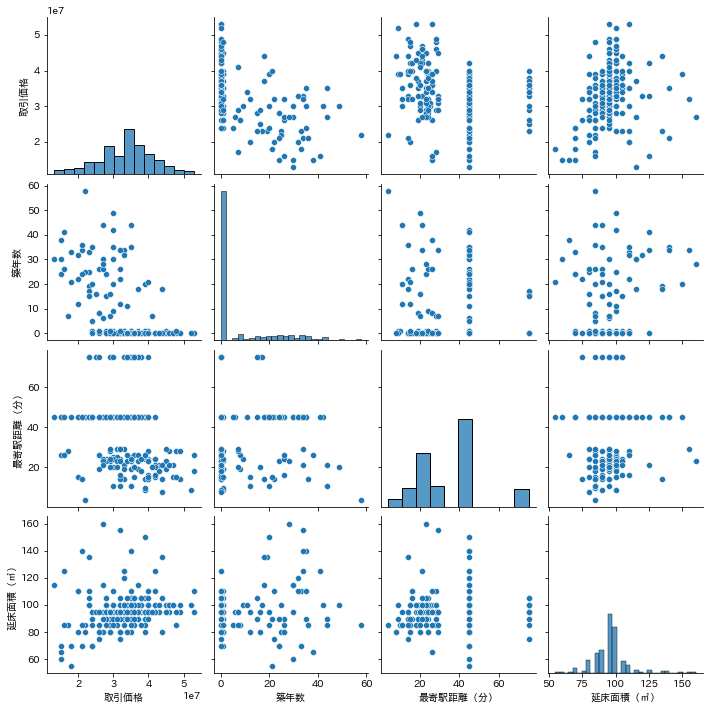

In [ ]:
sns.pairplot( totsuka_kodate[['取引価格','築年数','最寄駅距離（分）','延床面積（㎡）']])

#### 説明変数を増やす
説明変数に築年数、最寄駅距離（分）、延床面積（㎡）を設定します。

In [ ]:
train_x = totsuka_kodate[['築年数','最寄駅距離（分）','延床面積（㎡）']]

In [ ]:
train_x.head()

,築年数,最寄駅距離（分）,延床面積（㎡）
0,0,45,100
1,33,45,110
2,0,24,105
3,0,45,105
4,0,24,100


新たな説明変数で、モデルを学習させ、評価します。

#### 学習

In [ ]:
model.fit(train_x, train_y)

LinearRegression()

#### 評価

In [ ]:
# 傾きを求める
# 順番に築年数、最寄り駅距離、延床面積（㎡）
model.coef_

array([-364971.635, -148351.596,  173492.58 ])

In [ ]:
# 切片を求めるにはintercept_プロパティを使う
# y = ax + bのbの部分
model.intercept_

24626360.386

In [ ]:
# 精度を確認してみる
model.score(train_x, train_y)

0.494

## 予測精度の改善② カテゴリ変数を説明変数として使う
中古マンションの時と同じようにカテゴリ変数を使用してさらに説明変数を増やしてみましょう。

*   まずは「地区名」「前面道路種類」「土地の形状」の３つの変数についてどのような種類の値が入っているか確認してみます。

In [ ]:
totsuka_kodate['地区名'].value_counts()

戸塚町      62
深谷町      33
上矢部町    20
原宿        18
柏尾町      14
下倉田町    13
汲沢町      11
上倉田町    10
矢部町      10
舞岡町       6
吉田町       6
汲沢         5
東俣野町     2
秋葉町       1
名瀬町       1
俣野町       1
Name: 地区名, dtype: int64

In [ ]:
totsuka_kodate['前面道路種類'].value_counts()

市道    167
私道     43
県道      2
区道      1
Name: 前面道路種類, dtype: int64

In [ ]:
totsuka_kodate['土地の形状'].value_counts()

ほぼ長方形    74
長方形        41
不整形        25
袋地等        25
ほぼ台形      24
ほぼ正方形    10
ほぼ整形       7
台形           7
Name: 土地の形状, dtype: int64

#### ダミー変数化の実行
- pd.get_dummiesメソッドを使います
- 先ほど確認した３つの変数のほかに、面積（㎡）と前面道路幅員（ｍ）も説明変数として加えます。

In [ ]:
# 必要な説明変数をダミー変数化してtrain_xに取り出す
train_x = pd.get_dummies(totsuka_kodate[['築年数','最寄駅距離（分）','延床面積（㎡）','面積（㎡）','前面道路幅員（ｍ）','地区名', '前面道路種類', '土地の形状']])

In [ ]:
# train_xの中身を確認してみる
train_x.head()

,築年数,最寄駅距離（分）,延床面積（㎡）,面積（㎡）,前面道路幅員（ｍ）,地区名_上倉田町,地区名_上矢部町,地区名_下倉田町,地区名_俣野町,地区名_原宿,地区名_吉田町,地区名_名瀬町,地区名_戸塚町,地区名_東俣野町,地区名_柏尾町,地区名_汲沢,地区名_汲沢町,地区名_深谷町,地区名_矢部町,地区名_秋葉町,地区名_舞岡町,前面道路種類_区道,前面道路種類_市道,前面道路種類_県道,前面道路種類_私道,土地の形状_ほぼ台形,土地の形状_ほぼ整形,土地の形状_ほぼ正方形,土地の形状_ほぼ長方形,土地の形状_不整形,土地の形状_台形,土地の形状_袋地等,土地の形状_長方形
0,0,45,100,125,5.50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,33,45,110,190,6.50000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,24,105,65,5.00000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,45,105,145,2.20000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,24,100,110,4.00000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


モデルを再学習させて、評価します

In [ ]:
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
# 精度を確認してみる
model.score(train_x, train_y)

0.669

## 訓練データと検証データに分割して評価する

In [ ]:
# scikit-learnで提供される、訓練データと検証データを分けるライブラリをインポート
from sklearn.model_selection import train_test_split

**本研修でtotsuka_kodateデータセットを使用する際には、訓練データ70%、random_state=8で固定しています。他のモデルとの比較をしやすくするためです**

In [ ]:
# 訓練データと検証データに分割(70%を訓練用に使用)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, train_size=0.7, test_size=0.3, random_state=8)

In [ ]:
# train_xの件数を確認する
train_x.shape

(149, 33)

In [ ]:
# val_xの件数を確認する
val_x.shape

(64, 33)

分割したデータで訓練データ、検証データそれぞれに対して精度を求めてみます。

In [ ]:
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
# 訓練データに対しての精度を確認してみる
model.score(train_x, train_y)

0.683

In [ ]:
# 検証データに対しての精度を確認してみる
model.score(val_x, val_y)

0.501

このノートブックは以上です。